## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df,study_results_df, on="Mouse ID", how = "left")
# Display the data table for preview
#merged_df.head()
#mouse_metadata_df.count()
#study_results_df.count()
#merged_df.count()
#test = mouse_metadata_df["Mouse ID"].nunique(dropna=True)
#test

In [2]:
# Check the number of mice.
total_mice = merged_df["Mouse ID"].nunique(dropna=True)
total_mice

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
find_duplicates = merged_df.duplicated(subset=["Mouse ID", "Timepoint"],keep = False)
find_duplicates
#cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Drop any duplicate rows
merged_cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
merged_cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Recheck the number of mice
total_mice = merged_cleaned_df["Mouse ID"].nunique(dropna=True)
total_mice

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

#summary_statistics_test = merged_cleaned_df.groupby('Drug Regimen').describe()
#summary_statistics_test
summary_statistics = merged_cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean',
                                                                                 'median',
                                                                                 'var',
                                                                                 'std',
                                                                                 'sem'
                                                                                ]})

summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

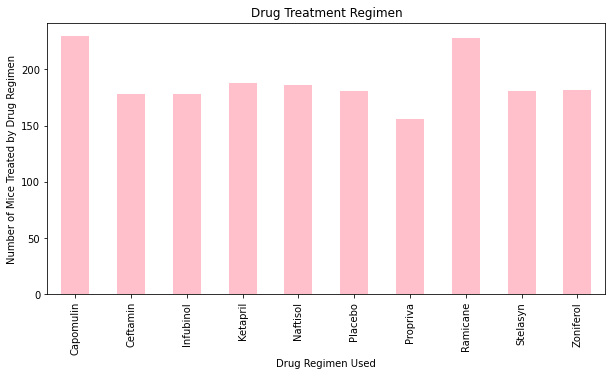

In [7]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
bar_plot = merged_cleaned_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
#bar_plot
bar_plot.plot(kind="bar", color="pink", stacked=True, figsize=(10,5))
plt.title("Drug Treatment Regimen",)
plt.ylabel("Number of Mice Treated by Drug Regimen")
plt.xlabel("Drug Regimen Used") 
plt.show()



In [8]:
# Generate identical bar plot using pyplot instead of pandas.
# Getting datapoints count by examining previus datatapoint variable
bar_plot


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

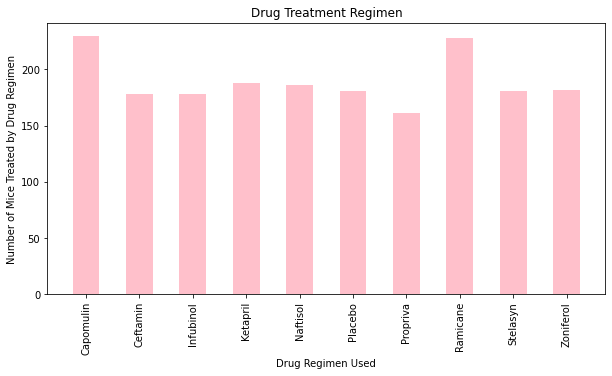

In [9]:
data_points = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
drug_names = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.figure(figsize=(10,5))
plt.bar(drug_names,data_points, color="pink", width=0.5)
plt.xticks(rotation='vertical')
plt.title("Drug Treatment Regimen",)
plt.ylabel("Number of Mice Treated by Drug Regimen")
plt.xlabel("Drug Regimen Used") 
plt.show()

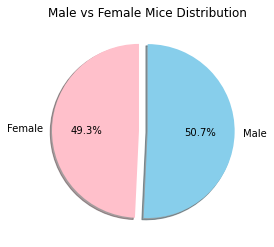

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count =  merged_cleaned_df.groupby('Sex')['Mouse ID'].count()
gender_count.head()
colors = ['pink', 'skyblue']
explode = (0.1,0)
gender_count.plot(kind="pie", autopct='%1.1f%%', colors=colors, shadow=True, explode=explode, startangle=90)
plt.title("Male vs Female Mice Distribution")
plt.axis("off")
plt.show()

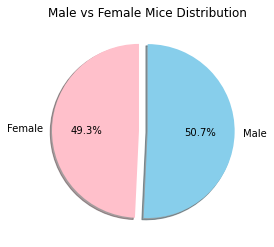

In [11]:
# Generate identical pie plot using pyplot

labels = ["Female", "Male"]
#sizes = [15, 30, 45, 10]
explode = (0.1, 0)
colors = ['pink', 'skyblue']
plt.pie(gender_count, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, explode=explode, startangle=90)
plt.title("Male vs Female Mice Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
each_mouse = merged_cleaned_df.groupby("Mouse ID").max()
max_timepoint = each_mouse.reset_index()
#max_timepoint
max_timepoint_df = max_timepoint[['Mouse ID','Timepoint']]
max_timepoint_df.head()


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [13]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = max_timepoint_df.merge(merged_cleaned_df, on = ['Mouse ID', 'Timepoint'], how="left")
tumor_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [14]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
treatment_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#######################################################################################
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# this was done inside the loop. Below is code commented out to check before the loop.

# mouse_by_drug_group_df = tumor_volume_df.groupby("Drug Regimen") 
# mouse_by_drug_group_df 

    

In [15]:
# Determine outliers using upper and lower bounds
for i in treatment_drugs:
    volume_drug = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == i]["Tumor Volume (mm3)"]
    quartiles = volume_drug.quantile([.25,.5,.75])
    lower_q = round(quartiles[0.25],2)
    upper_q = round(quartiles[0.75],2)
    iqr = upper_q-lower_q
    lower_bound = round(lower_q - (1.5*iqr),2)
    upper_bound = round(upper_q + (1.5*iqr),2)
    tumor_vol_data.append(volume_drug)
    
    print(f"-----------------------")
    print(f" The lower quartile of {i} is : {lower_q}")
    print(f" The upper quartile of {i}: {upper_q}")
    print(f" The interquartile range of {i}: {iqr}")
    print(f" These values below {lower_bound} could be outliers.")
    print(f" These values above {upper_bound} could be outliers.")
    print(f"-----------------------")

-----------------------
 The lower quartile of Capomulin is : 32.38
 The upper quartile of Capomulin: 40.16
 The interquartile range of Capomulin: 7.779999999999994
 These values below 20.71 could be outliers.
 These values above 51.83 could be outliers.
-----------------------
-----------------------
 The lower quartile of Ramicane is : 31.56
 The upper quartile of Ramicane: 40.66
 The interquartile range of Ramicane: 9.099999999999998
 These values below 17.91 could be outliers.
 These values above 54.31 could be outliers.
-----------------------
-----------------------
 The lower quartile of Infubinol is : 54.05
 The upper quartile of Infubinol: 65.53
 The interquartile range of Infubinol: 11.480000000000004
 These values below 36.83 could be outliers.
 These values above 82.75 could be outliers.
-----------------------
-----------------------
 The lower quartile of Ceftamin is : 48.72
 The upper quartile of Ceftamin: 64.3
 The interquartile range of Ceftamin: 15.579999999999998
 Th

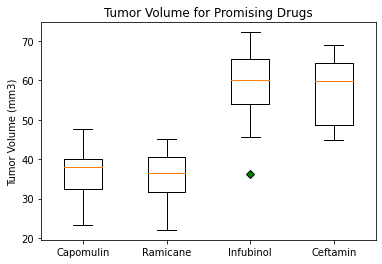

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
# using "tumor_vol_data" referenced above for x-axis tickers
marker = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Promising Drugs')
ax1.set_ylabel('Tumor Volume (mm3)')
bp = ax1.boxplot(tumor_vol_data,flierprops=marker)
ax1.set_xticklabels(treatment_drugs)
plt.savefig('../Images/drug_treatment_quartiles_charts.png')

plt.show()


## Line and Scatter Plots

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
mouse_by_capomulin = merged_cleaned_df.loc[merged_cleaned_df["Drug Regimen"] == "Capomulin"]
mouse_by_capomulin
single_mouse_id = "s185"
single_mouse_capomulin = mouse_by_capomulin.loc[mouse_by_capomulin["Mouse ID"] == single_mouse_id]
single_mouse_capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


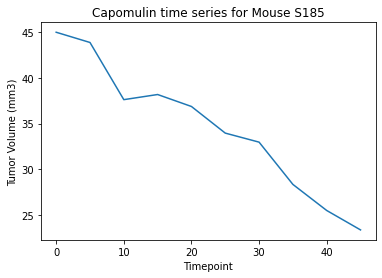

In [41]:
x_axis = single_mouse_capomulin["Timepoint"]
y_axis = single_mouse_capomulin["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin time series for Mouse S185")
plt.savefig('../Images/capomulin_series_mouse_S185.png')
plt.show()

Text(0.5, 1.0, 'Capomulin Regimen')

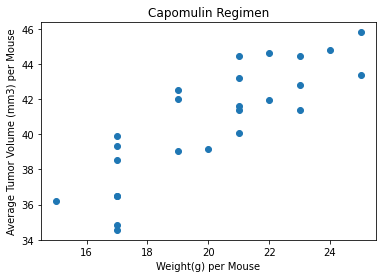

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
single_drug = merged_cleaned_df[merged_cleaned_df["Drug Regimen"]=="Capomulin"]
capomulin_regimen_analysis = single_drug.groupby("Mouse ID")
weight = capomulin_regimen_analysis["Weight (g)"].min()
avg_tumor_volume = capomulin_regimen_analysis["Tumor Volume (mm3)"].mean()
#weight
#avg_tumor_volume
plt.scatter(weight,avg_tumor_volume)
plt.xlabel("Weight(g) per Mouse")
plt.ylabel("Average Tumor Volume (mm3) per Mouse")
plt.title("Capomulin Regimen")
plt.savefig('../Images/capomulin_series_mouse_S185.png')

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
merged_cleaned_df.head(10)


# Observations and Insights